In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
import os

import warnings
warnings.simplefilter('ignore')

import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.applications import VGG16,VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
print(len(os.listdir("/content/drive/MyDrive/Pleural Effusion/Train/Normal")))
print(len(os.listdir("/content/drive/MyDrive/Pleural Effusion/Train/Pleural")))

936
906


In [3]:
Train = "/content/drive/MyDrive/Pleural Effusion/Train/"

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.05,
                                   width_shift_range = 0.2,
                                   height_shift_range= 0.2,
                                   zoom_range=0.2,
                                   shear_range=0.2)

train_gen = train_datagen.flow_from_directory(
    Train,
    target_size=(224, 224),
    batch_size=16,
    subset='training',
    class_mode='binary')

val_gen = train_datagen.flow_from_directory(
    Train, 
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    subset='validation')

Found 1751 images belonging to 2 classes.
Found 91 images belonging to 2 classes.


In [5]:
mobilenet_layer = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),include_top=False,weights="imagenet",
                                                    pooling='avg')

for layers in mobilenet_layer.layers:
    layers.trainable=False

layer_1 = Dense(512,activation='relu')(mobilenet_layer.output)
layer_2 = Dense(256,activation='relu')(layer_1)
layer_3 = Dense(128,activation='relu')(layer_2)

output_layer = Dense(1,activation='sigmoid')(layer_3)
mobilenet_model = Model(mobilenet_layer.input,output_layer)

9420800/9406464 [==============================] - 0s 0us/step


In [6]:
mobilenet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
mobilenet_history = mobilenet_model.fit(train_gen,validation_data=val_gen,epochs=10,steps_per_epoch=100,batch_size=16)

Epoch 1/10
100/100 [==============================] - 1207s 12s/step - loss: 0.3732 - accuracy: 0.8246 - val_loss: 0.3129 - val_accuracy: 0.8901
Epoch 2/10
100/100 [==============================] - 148s 1s/step - loss: 0.1997 - accuracy: 0.9271 - val_loss: 0.2818 - val_accuracy: 0.8681
Epoch 3/10
100/100 [==============================] - 57s 573ms/step - loss: 0.1548 - accuracy: 0.9397 - val_loss: 0.3352 - val_accuracy: 0.8791
Epoch 4/10
100/100 [==============================] - 51s 508ms/step - loss: 0.1559 - accuracy: 0.9403 - val_loss: 0.2137 - val_accuracy: 0.9231
Epoch 5/10
100/100 [==============================] - 49s 485ms/step - loss: 0.1755 - accuracy: 0.9334 - val_loss: 0.4939 - val_accuracy: 0.8132
Epoch 6/10
100/100 [==============================] - 49s 487ms/step - loss: 0.1409 - accuracy: 0.9472 - val_loss: 0.4288 - val_accuracy: 0.8462
Epoch 7/10
100/100 [==============================] - 49s 486ms/step - loss: 0.1395 - accuracy: 0.9466 - val_loss: 0.3951 - val_accu

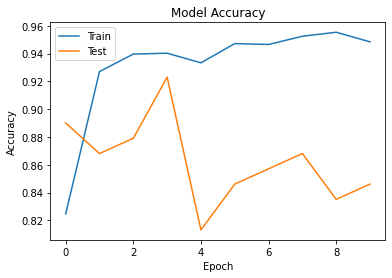

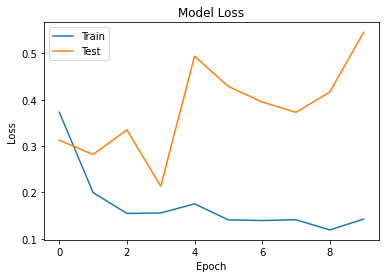

In [8]:
#Training
plt.plot(mobilenet_history.history['accuracy'])
plt.plot(mobilenet_history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train','Test'],loc='upper left')
plt.show()
#Loss
plt.plot(mobilenet_history.history['loss'])
plt.plot(mobilenet_history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [9]:
mobilenet_model.save("/content/drive/MyDrive/Pleural Effusion/mobilenetv2.h5")

# VGG19

In [10]:
vgg19_layer = VGG19(input_shape=(224,224,3),include_top=False,weights="imagenet",
                                                    pooling='avg')

for layers in vgg19_layer.layers:
    layers.trainable=False

layer_1 = Dense(512,activation='relu')(vgg19_layer.output)
layer_2 = Dense(256,activation='relu')(layer_1)
layer_3 = Dense(128,activation='relu')(layer_2)
output_layer = Dense(2,activation='softmax')(layer_3)

vgg_model = Model(vgg19_layer.input,output_layer)

80150528/80134624 [==============================] - 1s 0us/step


In [11]:
vgg_model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
vgg19_history = vgg_model.fit(train_gen,validation_data=val_gen,epochs=25,steps_per_epoch=100,batch_size=16)

Epoch 1/25
100/100 [==============================] - 65s 584ms/step - loss: 0.6061 - accuracy: 0.6530 - val_loss: 0.5325 - val_accuracy: 0.7473
Epoch 2/25
100/100 [==============================] - 52s 517ms/step - loss: 0.4243 - accuracy: 0.8070 - val_loss: 0.7618 - val_accuracy: 0.6593
Epoch 3/25
100/100 [==============================] - 52s 519ms/step - loss: 0.3593 - accuracy: 0.8416 - val_loss: 0.4621 - val_accuracy: 0.7912
Epoch 4/25
100/100 [==============================] - 52s 518ms/step - loss: 0.3178 - accuracy: 0.8680 - val_loss: 0.4062 - val_accuracy: 0.7692
Epoch 5/25
100/100 [==============================] - 52s 517ms/step - loss: 0.3509 - accuracy: 0.8366 - val_loss: 0.5336 - val_accuracy: 0.7473
Epoch 6/25
100/100 [==============================] - 52s 519ms/step - loss: 0.2790 - accuracy: 0.8793 - val_loss: 0.3541 - val_accuracy: 0.8242
Epoch 7/25
100/100 [==============================] - 52s 517ms/step - loss: 0.2470 - accuracy: 0.8975 - val_loss: 0.3984 - val_ac

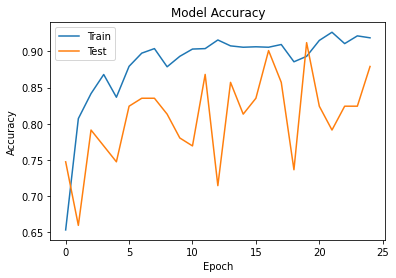

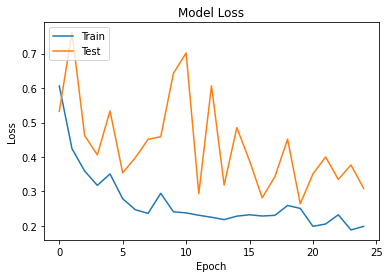

In [13]:
#Training
plt.plot(vgg19_history.history['accuracy'])
plt.plot(vgg19_history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train','Test'],loc='upper left')
plt.show()
#Loss
plt.plot(vgg19_history.history['loss'])
plt.plot(vgg19_history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [14]:
vgg_model.save("/content/drive/MyDrive/Pleural Effusion/Train/vgg19.h5")

# ResNet

In [15]:
resnet_layer = tf.keras.applications.ResNet152V2(input_shape=(224,224,3),include_top=False,weights="imagenet",
                                                    pooling='avg')

for layers in resnet_layer.layers:
    layers.trainable=False

layer_1 = Dense(512,activation='relu')(resnet_layer.output)
layer_2 = Dense(256,activation='relu')(layer_1)
layer_3 = Dense(128,activation='relu')(layer_2)
output_layer = Dense(1,activation='sigmoid')(layer_3)

resnet_model = Model(resnet_layer.input,output_layer)

234561536/234545216 [==============================] - 6s 0us/step


In [16]:
resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
resnet_history = resnet_model.fit(train_gen,validation_data=val_gen,epochs=10,steps_per_epoch=100,batch_size=16)

Epoch 1/10
100/100 [==============================] - 72s 605ms/step - loss: 0.3180 - accuracy: 0.8504 - val_loss: 0.5970 - val_accuracy: 0.8352
Epoch 2/10
100/100 [==============================] - 55s 552ms/step - loss: 0.2260 - accuracy: 0.9170 - val_loss: 0.6054 - val_accuracy: 0.8462
Epoch 3/10
100/100 [==============================] - 56s 559ms/step - loss: 0.1936 - accuracy: 0.9246 - val_loss: 0.3833 - val_accuracy: 0.8571
Epoch 4/10
100/100 [==============================] - 56s 563ms/step - loss: 0.1725 - accuracy: 0.9290 - val_loss: 0.3767 - val_accuracy: 0.8462
Epoch 5/10
100/100 [==============================] - 56s 558ms/step - loss: 0.1648 - accuracy: 0.9346 - val_loss: 0.3759 - val_accuracy: 0.9011
Epoch 6/10
100/100 [==============================] - 56s 560ms/step - loss: 0.1491 - accuracy: 0.9459 - val_loss: 0.4241 - val_accuracy: 0.8681
Epoch 7/10
100/100 [==============================] - 56s 561ms/step - loss: 0.1485 - accuracy: 0.9469 - val_loss: 0.3415 - val_ac

In [18]:
resnet_model.save("/content/drive/MyDrive/Pleural Effusion/Train/resnet.h5")